In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import numpy as np
from IPython.display import display
import glob
import os
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

In [3]:
my_model = load_model('D:\PROGRAMING\Python\Face Mask/model.h5')

In [4]:
face_cascade = cv2.CascadeClassifier('D:\PROGRAMING\Python\Face Mask/cascades/haarcascade_face.xml')

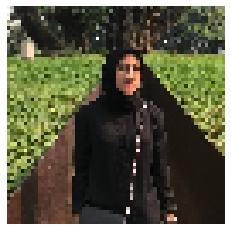

In [17]:
img = load_img('D:\PROGRAMING\Python\Face Mask/6.jpg',target_size=(64,64))
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
img = img_to_array(img)
img = np.expand_dims(img, axis = 0)

# PREDICT
prediksi = my_model.predict_classes(img)
result = my_model.predict(img)
idx = prediksi[0][0]

color = (0, 255, 0)
status =" Wearing Mask"
if (idx == 1):
    status =" Not Wearing Mask"
    color = (0, 0, 255)

print(prediksi)
print(result)
print(idx)
print(status)

[[1]]
[[1.]]
1
 Not Wearing Mask


In [41]:
cam = cv2.VideoCapture(0)

while(True):
    # Open Camera
    ret, frame = cam.read()
    
    # Try detecting Face
    # TODO : Face not detected when using masker
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 5)
    
    for (x, y, w, h) in faces :
        # Get the frame
        roi_color = rgb[y:y+w, x:x+h]
        
        # Reshape into 224x224
        img = np.array(roi_color, dtype='float')
        img = img.reshape(1, 64, 64, 3)
        
        # PREDICT
        prediksi = my_model.predict(img)
        idx = prediksi[0][0]

        color = (0, 255, 0)
        status =" Wearing Mask"
        if (idx == 1):
            status =" Not Wearing Mask"
            color = (0, 0, 255)
            
        print(prediksi)
        print(idx)
        print(status)
            
        font = cv2.FONT_HERSHEY_DUPLEX
        
        stroke = 1
        cv2.putText(frame, status, (x-10,y-10), font, 0.5, color, stroke, cv2.LINE_AA)

        stroke = 2
        end_cord_x = x + w
        end_cord_y = y + h
        cv2.rectangle(frame, (x, y), (end_cord_x, end_cord_y), color, stroke)   

    # Showing frame
    cv2.imshow('frame', frame)
    
    # Turn of camera 
    if cv2.waitKey(2) & 0xFF == ord('q'):
        cam.realease()
        cv2.destroyAllWindows()

[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask
[[0.]]
0.0
 Wearing Mask


AttributeError: 'cv2.VideoCapture' object has no attribute 'realease'